<a href="https://colab.research.google.com/github/giakomorssi/DataViz/blob/main/02_Visualizations%20(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Clean the Data

In [ ]:
# INSTALLING CHART STUDIO

!pip install -q chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
# IMPORTING THE LIBRARIES

import chart_studio
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import re

from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [ ]:
# IN ORDER TO RUN, THE "tweets.xlsx" FILE NEEDS TO BE UPLOADED ON GOOGLE DRIVE

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# DEFINING THE DATASET

df = pd.read_excel('/content/drive/MyDrive/tweet.xlsx')

In [ ]:
# ENCODING THE "VERIFIED" VARIABLE

le = LabelEncoder()

df['verified'] = le.fit_transform(df['verified'])

# Static Visualizations

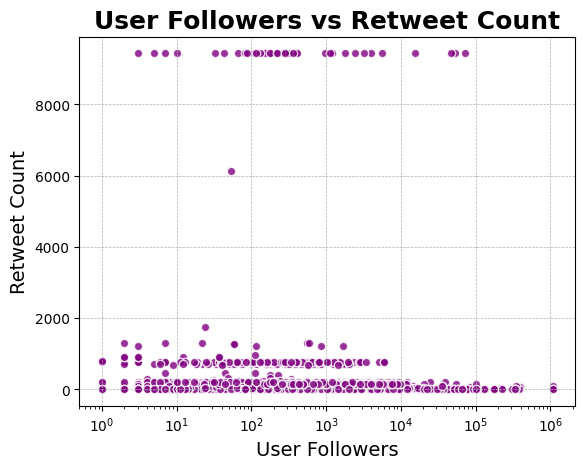

<Figure size 800x600 with 0 Axes>

In [ ]:
# SCATTERPLOT OF USER FOLLOWERS VS RETWEET COUNT

# Data
plt.scatter(df['user_followers'], df['retweet_count'], alpha=0.8, color='purple', edgecolors='white')

# Labels
plt.title('User Followers vs Retweet Count', fontsize=18, fontweight='bold')
plt.xlabel('User Followers', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)

# Logarithmic scale for better visualization
plt.xscale('log')

# Design
plt.grid(linestyle='--', linewidth=0.5)
plt.figure(figsize=(8,6))

plt.show()

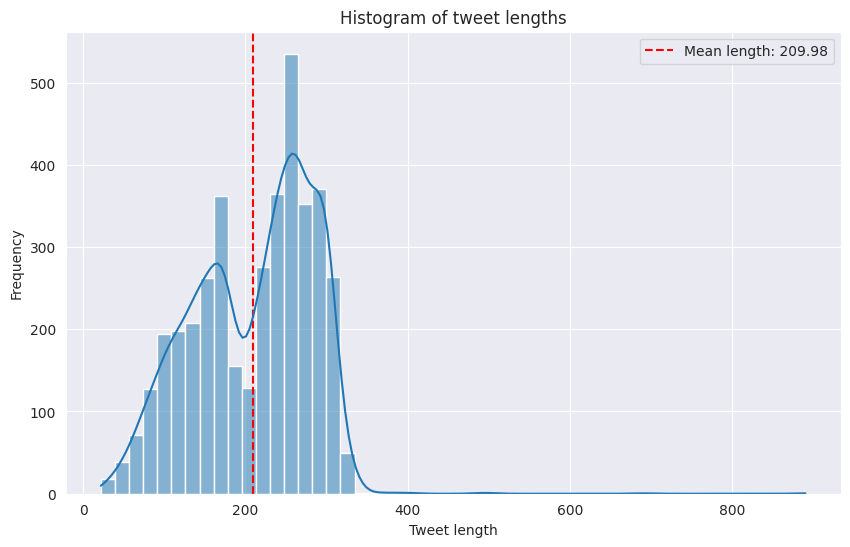

In [ ]:
# HISTOGRAM OF TWEET LENGHTS

# Data
tweet_lengths = df['tweet_text'].str.len()

# Design
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Background histogram
mean_length = sum(tweet_lengths) / len(tweet_lengths)
ax.axvline(mean_length, color='red', linestyle='--', label=f'Mean length: {mean_length:.2f}')

# Main histogram
sns.histplot(data=df, x=tweet_lengths, bins=50, kde=True, ax=ax)

# Labels & Legend
ax.set_xlabel('Tweet length')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of tweet lengths')
ax.legend()

plt.show()

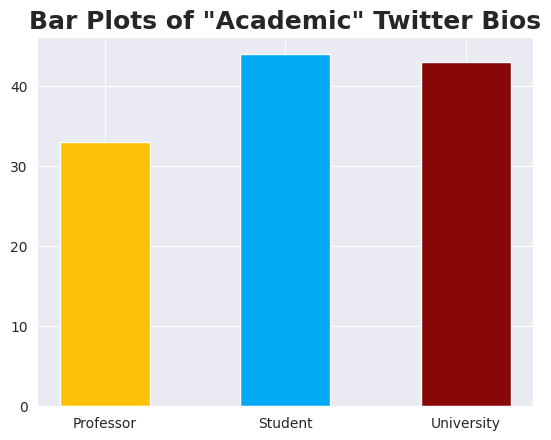

In [ ]:
# BAR PLOT OF ACADEMIC TWITTER BIOS

# Data - Extracting & Counting
bios = df['user_description']
prof_count = sum(isinstance(bio, str) and re.search(r'\bprofessor\b', bio.lower()) is not None for bio in bios)
student_count = sum(isinstance(bio, str) and re.search(r'\bstudent\b', bio.lower()) is not None for bio in bios)
univ_count = sum(isinstance(bio, str) and re.search(r'\buniversity\b', bio.lower()) is not None for bio in bios)

# Labels
labels = ['Professor', 'Student', 'University']
counts = [prof_count, student_count, univ_count]
plt.title('Bar Plots of "Academic" Twitter Bios', fontsize=18, fontweight='bold')

# Design
colors = ['#FFC107', '#03A9F4', '#880808']
bar_width = 0.5
plt.bar(labels, counts, color=colors, width=bar_width)

plt.show()

# Dynamic Visualizations

In [ ]:
# TWEET SOURCES BY QUERY

# Data - Top 10 Tweet Sources
top_tweet_sources = df['tweet_source'].value_counts().head(10).index.tolist()

# Filtered DF
df_top_tweet_sources = df[df['tweet_source'].isin(top_tweet_sources)]

# Chart
fig = px.bar(df_top_tweet_sources, y='query', color='tweet_source', barmode='stack', title='Tweet Sources by Query')

# Labels
fig.update_layout(xaxis_title='Count', yaxis_title='Query')

# Saving the plot to Plotly with the Plotly credentials
chart_studio.tools.set_credentials_file(username='giakomorossi', api_key='jQYmViiVXtTECQ3ZwyC1')
py.plot(fig, filename='Tweet Sources by Query', auto_open=True)

fig.show()

In [ ]:
# CATEGORY DISTRIBUTION IN TWEET TEXT

# Search Term input for the user
search_term = input('Enter the search term: ')

# Defining the regular expression pattern for categories
pattern = r'\b{}\w+'.format(search_term)
#pattern = r'#\w+'

# Function to extract the categories from the tweet text
def extract_categories(text):
    return re.findall(pattern, text)

# Data - Extracting the categories for each tweet & counting their frequency
data = pd.DataFrame(df)
data['categories'] = data['tweet_text'].apply(extract_categories)
category_counts = data['categories'].apply(pd.Series).stack().value_counts()

# Keeping only the top 10 categories
category_counts = category_counts.head(10)

# Converting the data to a dataframe for plotting in Plotly
df2 = pd.DataFrame({'Categories': category_counts.index, 'Frequency': category_counts.values})

# Adding % to the hover information
df2['Percentage'] = round(df2['Frequency'] / df2['Frequency'].sum() * 100, 2)
hover_template = 'Category: %{label}<br>Frequency: %{value}<br>Percentage: %{customdata}'

# Treemap
fig = px.treemap(df2, path=['Categories'], values='Frequency', title='Category Distribution in Tweet Text', hover_data=['Percentage'])
fig.update_traces(hovertemplate=hover_template)

# Saving the plot to Plotly with the Plotly credentials
chart_studio.tools.set_credentials_file(username='giakomorossi', api_key='jQYmViiVXtTECQ3ZwyC1')
py.plot(fig, filename='Category Distribution in Tweet Text', auto_open=True)

fig.show()

Enter the search term: no


<ipython-input-6-f46cc3548281>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  category_counts = data['categories'].apply(pd.Series).stack().value_counts()
